# Linear Regression

<br>

A linear model makes a prediction by simply computing a weighted
sum of the input features, plus a constant called the bias term (also called the intercept
term). <br>
Linear Regression model prediction (vectorized form) <br>
y = hθ x = θ · x <br>
 - θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.
 - x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
 - θ · x is the dot product of the vectors θ and x, which is of course equal to θ0x0 + θ1x1 + θ2x2 + ⋯ + θnxn.
 - hθ is the hypothesis function, using the model parameters θ. 
 
<br>
 
<div>
    <img src="images/cost_func_LR.png", width='400' />
    </div>

### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed-form solution, in other words, a mathematical equation that gives the result directly. <br>
This is called the Normal Equation.

<br>

<div>
    <img src="images/normal_eq.png", width='700' />
    </div>
 <br>
 Let’s generate some linear-looking data to test this equation on

# Setup
First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
import sys
assert sys.version_info >= (3,5)

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0,2"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

 **numpy.random.randn** generates samples from the normal distribution, while **numpy.random.rand** from a uniform distribution (in the range [0,1]). <br>

Second, why did the uniform distribution not work? The main reason is the activation function, especially in your case where you use the sigmoid function.

In [3]:
# Data for Normal Equation
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

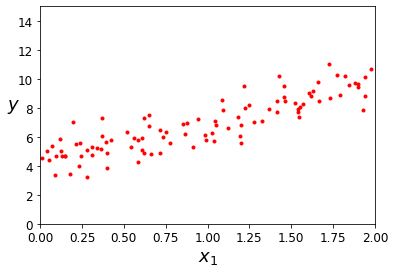

In [4]:
# plot the data
plt.plot(X, y, 'r.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2, 0,15])
plt.show()

<br>
Now let’s compute θ using the Normal Equation.

#### add $x_0$ = 1 to each instance

In [5]:
X_b = np.c_[np.ones((100,1)), X]

# This is done to accommodate the bias. While finding the hypothesis function the bias or the y-intercept part 
# is multiplied with 1 (column of 1) in the matrix multiplication.

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
# Now make predictions using θ

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]  # add x0 = 1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([[4.21509616],
       [9.75532293]])

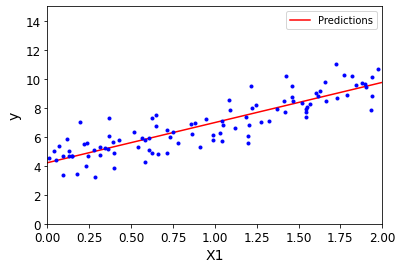

In [8]:
# lets plot the model predictions

plt.plot(X_new, y_pred, 'r-', label="Predictions")
plt.plot(X, y, 'b.')
plt.legend()
plt.xlabel("X1")
plt.ylabel("y")
plt.axis([0,2, 0,15])
plt.show()

<br>
Performing linear regression using Scikit-Learn

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_)
print(lin_reg.coef_)

lin_reg.predict(X_new)

[4.21509616]
[[2.77011339]]


array([[4.21509616],
       [9.75532293]])

<br>

The LinearRegression class is based on the scipy.linalg.lstsq() function (the name stands for “least squares”), which we could call directly. <br>


In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

<br>

This function computes $ θ = X^{+}y $, where $X^{+}$ is the pseudoinverse of X (specifically the
Moore-Penrose inverse). We can use np.linalg.pinv() to compute the pseudoinverse
directly. <br>

The pseudoinverse itself is computed using a standard matrix factorization technique
called Singular Value Decomposition (SVD) that can decompose the training set
matrix X into the matrix multiplication of three matrices U Σ $V^{T}$ . <br>

This approach is more efficient than computing the
Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may
not work if the matrix $X^{T}$X is not invertible (i.e., singular), such as if m < n or if some
features are redundant, but the pseudoinverse is always defined.

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

### Computational Complexity

The Normal Equation computes the inverse of $X^{T}$ X, which is an (n + 1) × (n + 1)
matrix (where n is the number of features). The computational complexity of inverting
such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$ (depending on the implementation).
In other words, if you double the number of features, you multiply the computation
time by roughly $2^{2.4}$ = 5.3 to $2^{3} = 8$.
The SVD approach used by Scikit-Learn’s LinearRegression class is about $O(n^{2})$. If
you double the number of features, you multiply the computation time by roughly 4. <br>
Both the Normal Equation and the SVD approach get very slow
when the number of features grows large (e.g., 100,000). <br>
Also, once you have trained your Linear Regression model (using the Normal Equation
or any other algorithm), predictions are very fast.

# Gradient Descent

It measures the local gradient of the error function with regards to the
parameter vector θ, and it goes in the direction of descending gradient. Once the gradient
is zero, you have reached a minimum.

<br>

<div>
    <img src="images/gradient_D.jpg", width="500" />
</div>

<br>

Not all cost functions look like nice regular bowls. There may be holes, ridges,
plateaus, and all sorts of irregular terrains, making convergence to the minimum very
difficult. 

<br>

<div>
    <img src="images/gd_pitfalls.jpg", width="500" />
</div>

<br>

If the random
initialization starts the algorithm on the left, then it will converge to a local minimum,
which is not as good as the global minimum. If it starts on the right, then it will
take a very long time to cross the plateau, and if you stop too early you will never
reach the global minimum. <br>

Fortunately, the MSE cost function for a Linear Regression model happens to be a
convex function, which means that if you pick any two points on the curve, the line
segment joining them never crosses the curve. This implies that there are no local
minima, just one global minimum. It is also a continuous function with a slope that
never changes abruptly.4 These two facts have a great consequence: Gradient Descent
is guaranteed to approach arbitrarily close the global minimum (if you wait long
enough and if the learning rate is not too high).

In fact, the cost function has the shape of a bowl, but it can be an elongated bowl if
the features have very different scales. Figure 4-7 shows Gradient Descent on a training
set where features 1 and 2 have the same scale (on the left), and on a training set
where feature 1 has much smaller values than feature 2 (on the right).

<br>

<div>
    <img src="images/gd_withScaling_withoutScaling.bmp", width="500" />
</div>

<br>
On the left the Gradient Descent algorithm goes straight toward the
minimum, thereby reaching it quickly, whereas on the right it first goes in a direction
almost orthogonal to the direction of the global minimum, and it ends with a long
march down an almost flat valley. It will eventually reach the minimum, but it will
take a long time.
When using Gradient Descent, you should ensure that all features
have a similar scale (e.g., using Scikit-Learn’s StandardScaler
class), or else it will take much longer to converge.

<br>

This diagram also illustrates the fact that training a model means searching for a
combination of model parameters that minimizes a cost function (over the training
set). It is a search in the model’s parameter space: the more parameters a model has,
the more dimensions this space has, and the harder the search is: searching for a needle
in a 300-dimensional haystack is much trickier than in three dimensions. Fortunately,
since the cost function is convex in the case of Linear Regression, the needle is
simply at the bottom of the bowl.

### Batch Gradient Descent
To implement Gradient Descent, you need to compute the gradient of the cost function
with regards to each model parameter θj. In other words, you need to calculate
how much the cost function will change if you change θj just a little bit. This is called
a partial derivative.

<br>

<div>
    <img src="images/partial_D.png", width="400" />
</div>

<br>
 
Instead of computing these partial derivatives individually, you can use Equation 4-6
to compute them all in one go. The gradient vector, noted $∇θMSE(θ)$, contains all the
partial derivatives of the cost function (one for each model parameter).

<br>

<div>
    <img src="images/gradient_vector.png", width="400" />
</div> 

<br>

Notice that this formula involves calculations over the full training
set X, at each Gradient Descent step! This is why the algorithm is
called Batch Gradient Descent: it uses the whole batch of training
data at every step (actually, Full Gradient Descent would probably
be a better name). As a result it is terribly slow on very large training
sets (but we will see much faster Gradient Descent algorithms
shortly). <br>

Once you have the gradient vector, which points uphill, just go in the opposite direction
to go downhill. This means subtracting ∇θMSE(θ) from θ. This is where the
learning rate η comes into play, multiply the gradient vector by η to determine the
size of the downhill step <br>

Gradient Descent step <br>

$ θ^{next step} = θ − η∇θMSE(θ) $

In [12]:
learning_rate = 0.1
n_iterations = 1000
m = 100

# random initializatin of parameter (theta)

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta-(learning_rate * gradients)

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

In [14]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

A simple solution is to set the no of iterations is that set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number ϵ (called the tolerance)—because this happens when Gradient Descent has(almost) reached the minimum.

### Stochastic Gradient Descent
The main problem with Batch Gradient Descent is the fact that it uses the whole
training set to compute the gradients at every step, which makes it very slow when
the training set is large. At the opposite extreme, Stochastic Gradient Descent just
picks a random instance in the training set at every step and computes the gradients
based only on that single instance. <br>

On the other hand, due to its stochastic (i.e., random) nature, this algorithm is much
less regular than Batch Gradient Descent: instead of gently decreasing until it reaches
the minimum, the cost function will bounce up and down, decreasing only on average.
So once the algorithm stops, the final parameter values are good, but not optimal.

<br>

<div>
    <img src="images/sgd.jpg", width="400" />
</div> 

<br>

When the cost function is very irregular (as in Figure 4-6), this can actually help the
algorithm jump out of local minima, so Stochastic Gradient Descent has a better
chance of finding the global minimum than Batch Gradient Descent does.
__Therefore randomness is good to escape from local optima, but bad because it means
that the algorithm can never settle at the minimum.__ One solution to this dilemma is
to gradually reduce the learning rate. The steps start out large (which helps make
quick progress and escape local minima), then get smaller and smaller, allowing the
algorithm to settle at the global minimum. This process is akin to simulated annealing,
an algorithm inspired from the process of annealing in metallurgy where molten
metal is slowly cooled down. The function that determines the learning rate at each
iteration is called the __learning schedule.__ If the learning rate is reduced too quickly, you
may get stuck in a local minimum, or even end up frozen halfway to the minimum. If
the learning rate is reduced too slowly, you may jump around the minimum for a
long time and end up with a suboptimal solution if you halt training too early.

In [15]:
n_epochs = 50

# learning shedule hyperparameters
t0, t1 = 5, 50
def learning_schedule(t):
    return t0 / (t + t1)
    
# random initialization
theta = np.random.randn(2,1)

# Create a loop over the number of epochs.
for epochs in range(n_epochs):
    
    # And a loop over the size of the training data.
    for i in range(m):
        
        # Pick a random instance: this function takes a random value in the range from 0 to m.
        random_index = np.random.randint(m)
        
        # Now, store this random instance and its target value into the variables xi and yi ...
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        
        # ... and calculate gradients and beta as before. Remember to calculate the value of the learning
        # rate from the learning-rate schedule defined above (epoch * m + i) is just the number of the
        # current training step over all epochs.
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epochs * m + i)
        theta = theta - eta * gradients
        



In [16]:
theta

array([[4.18475289],
       [2.73036719]])

<br>

To perform Linear Regression using SGD with Scikit-Learn
code runs for maximum 1000 epochs (max_iter=1000) or until the loss drops
by less than 1e-3 during one epoch (tol=1e-3), starting with a learning rate of 0.1
(eta0=0.1), using the default learning schedule (different from the preceding one),
and it does not use any regularization (penalty=None; more details on this shortly):

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.22609703]), array([2.79227913]))

### Mini-batch Gradient Descent

Minibatch GD computes the gradients on small random sets of instances called minibatches. <br>
The algorithm’s progress in parameter space is less erratic than with SGD, especially
with fairly large mini-batches. As a result, Mini-batch GD will end up walking
around a bit closer to the minimum than SGD. But, on the other hand, it may be
harder for it to escape from local minima.

# Polynomial Regression

In [19]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

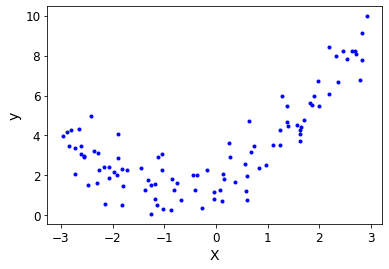

In [20]:
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

Scikit-Learn’s Poly
nomialFeatures class to transform our training data, adding the square (2nd-degree
polynomial) of each feature in the training set as new features.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0], X_poly[0]

# X_poly now contains the original feature of X plus the square of this feature




(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [22]:
# fit a LinearRegression model to this extended training data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [23]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [24]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

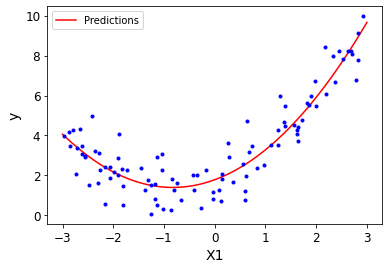

In [25]:
plt.plot(X_new,y_new, 'r', label="Predictions")
plt.plot(X, y, 'b.')
plt.legend()
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

# Learning Curves

We can get an estimate of a model’s generalization
performance through cross-validation process as well as with Learning Curves.
These are plots of the model’s performance
on the training set and the validation set as a function of the training set size
(or the training iteration). To generate the plots, simply train the model several times
on different sized subsets of the training set.

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training Set Size")
    plt.ylabel('RMSE')
    plt.legend()

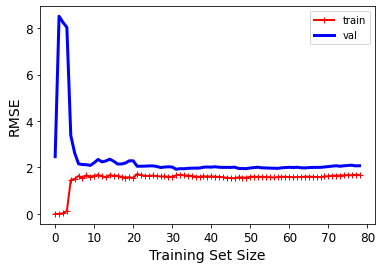

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# These learning curves are typical of an underfitting model. Both curves have reached
# a plateau; they are close and fairly high.
# If model is underfitting the training data, adding more training examples will not help. 
# We need to use a more complex model or come up with better features.

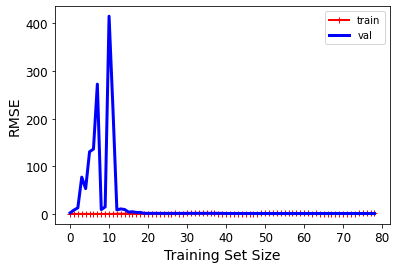

In [28]:
# look at the learning curves of a 10th-degree polynomial model on the same data

from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                                  ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

# Regularized Linear Models

To reduce overfitting is to regularize the
model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data.
A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
For a linear model, regularization is typically achieved by constraining the weights of
the model.

### Ridge Regression

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear
Regression: a regularization term equal to $ αΣ_{i = 1} ^{n} θ_{i}^{2} $ is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model
weights as small as possible. Note that the regularization term should only be added
to the cost function during training. Once the model is trained, you want to evaluate
the model’s performance using the unregularized performance measure. <br>

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.

<br>

<div>
    <img src="images/ridge_R.png", width='300' />
</div>

<br>

The bias term $θ_{0}$ is not regularized(the sum starts at i = 1, not 0). <br>
If we define w as the vector of feature weights $ (θ_{1} $ to $ θ_{n}) $, then the regularization term is
simply equal to $ ½(∥ w ∥2)_{2} $, where $ ∥ w ∥_{2} $ represents the $ ℓ_{2} $ norm of the weight vector.For Gradient Descent, just add αw to the MSE gradient vector. <br>

It is important to scale the data (e.g., using a StandardScaler)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models. <br>

We can perform Ridge Regression either by computing a
closed-form equation or by performing Gradient Descent.

<br>

<div>
    <img src="images/ridge_R_closed.png", width='300' />
</div>


In [29]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

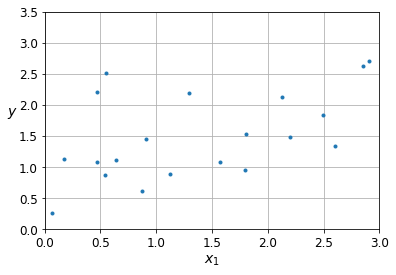

In [30]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [31]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X,y)

Ridge(alpha=1, solver='cholesky')

In [32]:
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [33]:
# using SGD

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.46543286])

### Lasso Regression
Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the $ ℓ_{1} $ norm
of the weight vector instead of half the square of the $ ℓ_{2} $ norm.

<br>

<div>
    <img src="images/lasso_reg.png", width='300' />
</div>

<br>

Lasso Regression subgradient vector

<div>
    <img src="images/lasso_subgradient.png", width='400' />
</div>

    

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression.

<br>

<div>
    <img src="images/elastic_reg.png", width='400' />
</div>

<br>
It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should prefer
Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero. <br>
Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

In [35]:
from sklearn.linear_model import ElasticNet

elastic_Net_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_Net_reg.fit(X,y)
elastic_Net_reg.predict([[1.5]])

array([1.54333232])

### Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.

<br>

<div>
    <img src="images/early_stoping.jpg", width='400' />
</div>

<br>
As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set
naturally goes down, and so does its prediction error on the validation set. However,
after a while the validation error stops decreasing and actually starts to go back up.
This indicates that the model has started to overfit the training data. <br>
With Stochastic and Mini-batch Gradient Descent, the curves are
not so smooth, and it may be hard to know whether you have
reached the minimum or not. One solution is to stop only after the
validation error has been above the minimum for some time (when
you are confident that the model will not do any better), then roll
back the model parameters to the point where the validation error
was at a minimum.

# Logistic Regression
Logistic Regression (also called Logit Regression) is commonly
used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.


### Estimating Probabilities
Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result.

<br>

<div>
    <img src="images/logistic_Reg.jpg", width='300' />
</div>

<br>

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1.

<br>

<div>
    <img src="images/sig_Func.png", width='300' />
</div>

<br>
<br>

<div>
    <img src="images/logistic_Reg_2.png", width='300' />
</div>

<br>

The score t is often called the logit: this name comes from the fact
that the logit function, defined as logit(p) = log(p / (1 - p)), is the
inverse of the logistic function. Indeed, if you compute the logit of
the estimated probability p, you will find that the result is t. The
logit is also called the log-odds, since it is the log of the ratio
between the estimated probability for the positive class and the
estimated probability for the negative class.

### Training and Cost Function
The objective of training is to set the parameter
vector θ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This idea is captured by the
cost function shown in Equation for a single training instance x.



<div>
    <img src="images/cost_funct_LR.png", width='300' />
</div>

<br>

<div>
    <img src="images/LR_costF_graph_2.png", width='500' />
</div>

The Red line represents 1 class. As we can see, when the predicted probability (x-axis) is close to 1, the loss is less and when the predicted probability is close to 0, loss approaches infinity.

The Black line represents 0 class. As we can see, when the predicted probability (x-axis) is close to 0, the loss is less and when the predicted probability is close to 1, loss approaches infinity.

<br>

<div>
    <img src="images/log_loss.png", width='500' />
</div>

<br>

The bad news is that there is no known closed-form equation to compute the value of
θ that minimizes this cost function (there is no equivalent of the Normal Equation).
But the good news is that this cost function is convex, so Gradient Descent (or any
other optimization algorithm) is guaranteed to find the global minimum.

<br>

<div>
    <img src="images/cf_partial_der.png", width='400' />
</div>

<br>



### Decision Boundaries

In [36]:
# Let’s try to build a classifier to detect the Iris-Virginica type based only on the petal width feature.

from sklearn import datasets

iris = datasets.load_iris()

In [37]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [44]:
# petal width

X = iris['data'][:,3:]  

In [52]:
# 1 if Iris-Virginica, else 0

y = (iris["target"] == 2).astype(np.int32)

In [56]:
from sklearn.linear_model import LogisticRegression

log_Reg = LogisticRegression()
log_Reg.fit(X, y)

LogisticRegression()

Text(0, 0.5, 'Probability')

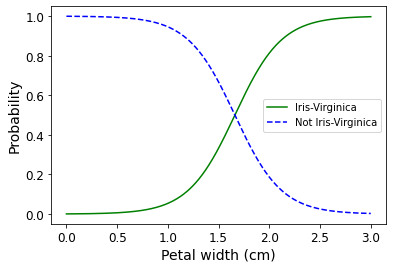

In [65]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_Reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')

In [66]:
log_Reg.predict([[1.7],[1.5]])

array([1, 0])

Just like the other linear models, Logistic Regression models can be regularized using
ℓ1 or ℓ2 penalties. Scitkit-Learn actually adds an ℓ2 penalty by default.
The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.

### Softmax Regression
The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers.This is called Softmax Regression, or Multinomial Logistic Regression. <br>
When given an instance x, the Softmax Regression model
first computes a score sk(x) for each class k, then estimates the probability of each
class by applying the softmax function (also called the normalized exponential) to the
scores.

Softmax score for class k
$ s_{k}(x) = x^{T}(θ)^{k} $ <br>

Note that each class has its own dedicated parameter vector θ(k). All these vectors are
typically stored as rows in a parameter matrix Θ. <br>

Once you have computed the score of every class for the instance x, you can estimate
the probability pk that the instance belongs to class k by running the scores through
the softmax function, it computes the exponential of every score,
then normalizes them (dividing by the sum of all the exponentials). The scores are
generally called logits or log-odds (although they are actually unnormalized logodds).

<br>

<div>
    <img src="images/softmax_func.png", width='400' />
</div>

<br>

- K is the number of classes.
- s(x) is a vector containing the scores of each class for the instance x.
- σ(s(x))k is the estimated probability that the instance x belongs to class k given
the scores of each class for that instance.

<br>

<div>
    <img src="images/argmax.png", width='500' />
</div>

<br>

- The argmax operator returns the value of a variable that maximizes a function. In
this equation, it returns the value of k that maximizes the estimated probability
σ(s(x))k. <br>

The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.

<br>

The objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes). Minimizing the cost function shown in Equation 4-22, called the cross
entropy, should lead to this objective because it penalizes the model when it estimates
a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities match the target classes.

<br>

<div>
    <img src="images/cross_entropy.png", width='400' />
</div>

<br>

- $ y_{k} ^{(i)} $ is the target probability that the ith instance belongs to class k. In general, it is
either equal to 1 or 0, depending on whether the instance belongs to the class or
not.

#### Cross Entropy

Cross entropy originated from information theory. Suppose you want to efficiently
transmit information about the weather every day. If there are eight options (sunny,
rainy, etc.), you could encode each option using 3 bits since 23 = 8. However, if you
think it will be sunny almost every day, it would be much more efficient to code
“sunny” on just one bit (0) and the other seven options on 4 bits (starting with a 1).
Cross entropy measures the average number of bits you actually send per option. If
your assumption about the weather is perfect, cross entropy will just be equal to the
entropy of the weather itself (i.e., its intrinsic unpredictability). But if your assumptions
are wrong (e.g., if it rains often), cross entropy will be greater by an amount
called the Kullback–Leibler divergence. <br>

Cross entropy gradient vector for class k

<br>

<div>
    <img src="images/cross_entropy_GV.png", width='400' />
</div>

<br>

Scikit-
Learn’s LogisticRegression uses one-versus-all by default when you train it on more
than two classes, but you can set the multi_class hyperparameter to "multinomial"
to switch it to Softmax Regression instead. You must also specify a solver that supports
Softmax Regression, such as the "lbfgs" solver.
It also applies $ℓ_2 $ regularization by default, which you can
control using the hyperparameter C.


In [67]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [68]:
softmax_reg.predict([[5, 2]])

array([2])

In [69]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])